<a href="https://colab.research.google.com/github/N3wBaz/ml-intro/blob/2022/2_data_exploration/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Context

In [ ]:
# Import libruaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Читаем датасет из файла

# data_filepath = "/content/gdrive/MyDrive/RS_school_course/2_eda/train.csv.zip"
# Если не пойдет пропишите пожалуйста путь к датасету у вас, просто я делал в google Colaboratory.
data_filepath = "RS_school_course/2_eda/train.csv.zip"
original_data = pd.read_csv(data_filepath)

In [ ]:
original_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S


# Data quality assessment

Оценка качества данных является необходимым шагов задачи анализа данных. Так как работая с некачественными данными можно получить некорректный результат. В данном случае выделим следующие этапы:

*   поиск пропущеных значений
*   поиск дубликатов
*   проверка на выбросы





In [ ]:
# Посмотрим на данные

original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [ ]:
# Поменяем тип данных с int64 и object на category для Survived, Pclass, Sex, SibSp, Parch, Embarked

original_data['Survived'] = original_data['Survived'].astype('category')
original_data['Pclass'] = original_data['Pclass'].astype('category')
original_data['Sex'] = original_data['Sex'].astype('category')
original_data['SibSp'] = original_data['SibSp'].astype('category')
original_data['Parch'] = original_data['Parch'].astype('category')
original_data['Embarked'] = original_data['Embarked'].astype('category')

In [ ]:
# После смены типа данных уменьшился объем используемой памяти с 9.2 до 5.2

original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   PassengerId  100000 non-null  int64   
 1   Survived     100000 non-null  category
 2   Pclass       100000 non-null  category
 3   Name         100000 non-null  object  
 4   Sex          100000 non-null  category
 5   Age          96708 non-null   float64 
 6   SibSp        100000 non-null  category
 7   Parch        100000 non-null  category
 8   Ticket       95377 non-null   object  
 9   Fare         99866 non-null   float64 
 10  Cabin        32134 non-null   object  
 11  Embarked     99750 non-null   category
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 5.2+ MB


Проверка на пропущенные значение

In [ ]:
# Проверим наш датасет на пропуски и нулевые значения

mis_data = original_data.isnull().sum()
print(mis_data)
print('\nКоличество пропущенных значений по категориям в %')
for i, v in enumerate(mis_data.values):
    if v:
        print(f"{mis_data.index[i]} :   {(v / original_data.shape[0]) * 100} %")

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

Количество пропущенных значений по категориям в %
Age :   3.292 %
Ticket :   4.623 %
Fare :   0.134 %
Cabin :   67.866 %
Embarked :   0.25 %


In [ ]:
# В категории Cabin отсутствует почти 70% всех значений, такое количество не восполнить средним, медианой или еще каким нибудь способом.
# Не будем учитывать номер каюты

Проверка данных на дубликаты

In [ ]:
# Проверим весь датасет на полное повторения записей
original_data.duplicated(keep=False).value_counts()

False    100000
dtype: int64

Повторений записей целиком нет. Проверим дубликаты по категориям Name, Ticket, Cabin, Fare.

In [ ]:
dub_name = original_data.duplicated(subset=['Name'], keep='first')
dub_ticket = original_data.duplicated(subset=['Ticket'], keep='first')
dub_cabin = original_data.duplicated(subset=['Cabin'], keep='first')
dub_pass = original_data.duplicated(subset=['Fare'], keep='first')

print(f"Количество повторов в категории 'Name' : {dub_name.value_counts().values[1]}")
print(f"Количество повторов в категории 'Ticket' : {dub_ticket.value_counts().values[1]}")
print(f"Количество повторов в категории 'Cabin' : {dub_cabin.value_counts().values[1]}")
print(f"Количество повторов в категории 'Fare' : {dub_pass.value_counts().values[1]}")

Количество повторов в категории 'Name' : 7856
Количество повторов в категории 'Ticket' : 24668
Количество повторов в категории 'Cabin' : 26993
Количество повторов в категории 'Fare' : 15936


Видно, что по отдельным категориям есть повторения. Посмотрим, например, на категорию Name упорядоченную по значениям

In [ ]:
dub_name_all = original_data.duplicated(subset=['Name'], keep=False)
original_data[dub_name_all].sort_values(by=["Name"]).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
83433,83433,0,1,"Abbott, Steven",male,62.0,1,1,C.A. 415184,81.79,A15776,S
43514,43514,0,3,"Abbott, Steven",male,39.0,0,0,44125,23.38,NaN,S
11074,11074,0,3,"Acevedo, James",male,51.0,0,0,NaN,29.08,NaN,S
40840,40840,0,1,"Acevedo, James",male,NaN,0,0,420535,102.87,A10333,S
39910,39910,0,3,"Acosta, David",male,23.0,0,0,30739,12.56,NaN,S


Но, очевидно, что в большой группе людей могут быть совпадения по имени, поэтому проверим наличие дубликатов по нескольким категориям одновременно. Возьмем Name, Age, Pclass, SibSp, Parch, Embarked.

In [ ]:
dub_name_age = original_data.duplicated(subset=['Name', 'Age'], keep='first')
dub_name_age_sib = original_data.duplicated(subset=['Name', 'Age', 'SibSp'], keep='first')
dub_name_age_sib_par = original_data.duplicated(subset=['Name', 'Age', 'SibSp', 'Parch'], keep='first')
dub_name_age_sib_par_pcl = original_data.duplicated(subset=['Name', 'Age', 'SibSp', 'Pclass', 'Parch'], keep='first')
dub_name_age_sib_par_pcl_emb = original_data.duplicated(subset=['Name', 'Age', 'SibSp', 'Pclass', 'Parch','Embarked'], keep='first')

print(f"Количество повторов в категориях Name, Age : {dub_name_age.value_counts().values[1]}")
print(f"Количество повторов в категориях Name, Age, SibSp : {dub_name_age_sib.value_counts().values[1]}")
print(f"Количество повторов в категориях Name, Age, SibSp, Parch : {dub_name_age_sib_par.value_counts().values[1]}")
print(f"Количество повторов в категориях Name, Age, SibSp, Parch, Pclass : {dub_name_age_sib_par_pcl.value_counts().values[1]}")
print(f"Количество повторов в категориях Name, Age, SibSp, Parch, Pclass, Embarked : {dub_name_age_sib_par_pcl_emb.value_counts().values[1]}")

Количество повторов в категориях Name, Age : 293
Количество повторов в категориях Name, Age, SibSp : 186
Количество повторов в категориях Name, Age, SibSp, Parch : 150
Количество повторов в категориях Name, Age, SibSp, Parch, Pclass : 75
Количество повторов в категориях Name, Age, SibSp, Parch, Pclass, Embarked : 62


Посмотрим на дубликаты по категориям Name, Age, SibSp, Parch, Pclass, Ebarked одновременно

In [ ]:
dub_name_age_sib_par_pcl_emb = original_data.duplicated(subset=['Name', 'Age', 'SibSp', 'Pclass', 'Parch', 'Embarked'], keep=False)
original_data[dub_name_age_sib_par_pcl_emb].sort_values(by=['Name', 'Age', 'SibSp', 'Pclass', 'Parch']).head(15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
26577,26577,0,3,"Allen, Jesse",male,26.0,0,0,NaN,8.43,NaN,S
64229,64229,0,3,"Allen, Jesse",male,26.0,0,0,11945,9.59,NaN,S
8199,8199,0,2,"Baker, William",male,52.0,0,0,15757,20.78,NaN,S
63579,63579,1,2,"Baker, William",male,52.0,0,0,C.A. 13263,76.59,NaN,S
15894,15894,0,3,"Brown, Michael",male,57.0,1,0,444422,63.78,NaN,S
48590,48590,0,3,"Brown, Michael",male,57.0,1,0,8479,31.66,NaN,S
1532,1532,0,3,"Brown, Patrick",male,NaN,0,0,12572,24.54,NaN,S
27444,27444,0,3,"Brown, Patrick",male,NaN,0,0,STON/O 3996612,11.19,NaN,S
45153,45153,0,3,"Brown, Richard",male,22.0,0,0,298962,26.78,NaN,S
59299,59299,0,3,"Brown, Richard",male,22.0,0,0,408243,10.98,NaN,S


Создадим новый датасет с удаленными дубликатами по категориям Name, Age, SibSp, Parch, Pclass, Embarked (62 штуки)

In [ ]:
df = original_data.drop_duplicates(subset=['Name', 'Age', 'SibSp', 'Pclass', 'Parch','Embarked'], keep='first')

Перед заполнением пропущеных значений проверим наши данные на выбросы

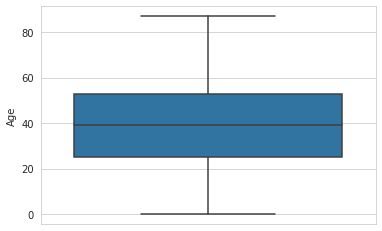

In [ ]:
# Диаграмма размаха (boxplot) для категории Age

sns.boxplot(y='Age', data=df)
plt.show()

По графику Boxplot(диаграмме размаха) видно, что в категории Age нет значений лежащих за пределами следующих интервалов: Q1–1.5 x IQR и Q3 + 1.5 x IQR

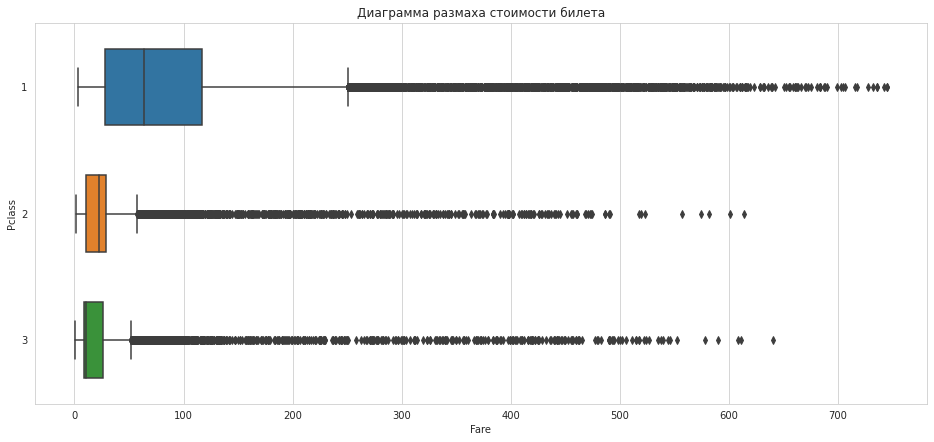

In [ ]:
# Ящик с усами для категории Fare

plt.figure(figsize=(16,7))
plt.title('Диаграмма размаха стоимости билета')
sns.boxplot(x='Fare', y='Pclass', width=0.6, data=df)
plt.show()


На мой взгляд коректнее искать выбросы в цене внутри класса. Выбросов получается больше, чем если воспринимать категорию Fare как единое целое.

In [ ]:
def irq(number, pclass=0):
    if pclass == 0:
        quantile = number.Fare.describe()
    else:
        quantile = number.query(f"Pclass == {pclass}").Fare.describe()
    q25 = quantile['25%']
    q50 = quantile['50%']
    q75 = quantile['75%']
    IRQ = q75 - q25
    limit = q75 + 1.5*IRQ
    return (q25, q50, q75, limit)
print("Количество выбросов для первого класса: " ,len(df.query(f'Pclass == 1 and Fare > {irq(df, 1)[3]}')))
print("Количество выбросов для второго класса: " ,len(df.query(f'Pclass == 2 and Fare > {irq(df, 2)[3]}')))
print("Количество выбросов для третьего класса: " ,len(df.query(f'Pclass == 3 and Fare > {irq(df, 3)[3]}')))
print("Количество выбросов для FareClean без разделения: " ,len(df.query(f'Pclass == 3 and Fare > {irq(df)[3]}')))

Количество выбросов для первого класса:  2069
Количество выбросов для второго класса:  1808
Количество выбросов для третьего класса:  2761
Количество выбросов для FareClean без разделения:  1877


Заменим пропущеные значения в Fare средним по классу исключая выбросы

In [ ]:
# среднее по классу
mean_1 = df.query(f'Pclass == 1 and Fare < {irq(df, 1)[3]}').Fare.mean()
mean_2 = df.query(f'Pclass == 2 and Fare < {irq(df, 2)[3]}').Fare.mean()
mean_3 = df.query(f'Pclass == 3 and Fare < {irq(df, 3)[3]}').Fare.mean()

# Заменяем средним по классу
df.loc[(df["Fare"].isna()) & (df['Pclass'] == 1), 'Fare'] = mean_1
df.loc[(df["Fare"].isna()) & (df['Pclass'] == 2), 'Fare'] = mean_2
df.loc[(df["Fare"].isna()) & (df['Pclass'] == 3), 'Fare'] = mean_3


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Заменяем пропущенные значения в Age средним возрастом по классу и полу, а Embarked самым частым значением.

In [ ]:
# Заполняем пропуски в категории Age средним значением по классу и полу

mean_age_f1 = df.loc[(df['Sex'] == 'female' ) & (df['Pclass'] == 1)].Age.mean()
mean_age_f2 = df.loc[(df['Sex'] == 'female' ) & (df['Pclass'] == 2)].Age.mean()
mean_age_f3 = df.loc[(df['Sex'] == 'female' ) & (df['Pclass'] == 3)].Age.mean()
mean_age_m1 = df.loc[(df['Sex'] == 'male' ) & (df['Pclass'] == 1)].Age.mean()
mean_age_m2 = df.loc[(df['Sex'] == 'male' ) & (df['Pclass'] == 2)].Age.mean()
mean_age_m3 = df.loc[(df['Sex'] == 'male' ) & (df['Pclass'] == 3)].Age.mean()

df.loc[(df['Sex'] == 'female' ) & (df['Pclass'] == 1) & (df["Age"].isna()), 'Age'] = mean_age_f1
df.loc[(df['Sex'] == 'female' ) & (df['Pclass'] == 2) & (df["Age"].isna()), 'Age'] = mean_age_f2
df.loc[(df['Sex'] == 'female' ) & (df['Pclass'] == 3) & (df["Age"].isna()), 'Age'] = mean_age_f3
df.loc[(df['Sex'] == 'male' ) & (df['Pclass'] == 1) & (df["Age"].isna()), 'Age'] = mean_age_m1
df.loc[(df['Sex'] == 'male' ) & (df['Pclass'] == 2) & (df["Age"].isna()), 'Age'] = mean_age_m2
df.loc[(df['Sex'] == 'male' ) & (df['Pclass'] == 3) & (df["Age"].isna()), 'Age'] = mean_age_m3


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# Заполняем пропуски в категории Embarked самым частым значением
emb_fill = df['Embarked'].value_counts().index[0]
df['Embarked'] = df['Embarked'].fillna(emb_fill)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Повторно проверяем датасет на наличие пропущенных значений

In [ ]:
mis_data = df.isnull().sum()
print(mis_data)
print('\nКоличество пропущенных значений по категориям в %')
for i, v in enumerate(mis_data.values):
    if v:
        print(f"{mis_data.index[i]} :   {(v / df.shape[0]) * 100} %")

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket          4619
Fare               0
Cabin          67812
Embarked           0
dtype: int64

Количество пропущенных значений по категориям в %
Ticket :   4.62186555664512 %
Cabin :   67.85406952310431 %


# Data exploration

Категория ***Survived***

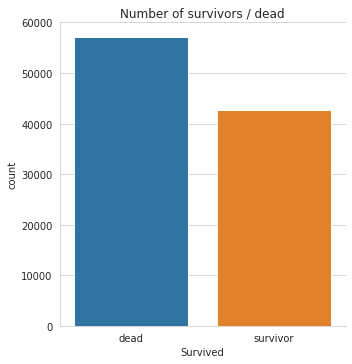

В этой симуляции Титаника погибло примерно 57.2% человек из 99938 пассажиров


In [ ]:
g = sns.catplot(x="Survived", kind='count', data=df).set(title='Number of survivors / dead').set_xticklabels(["dead", "survivor"])
plt.show()
died = round((df['Survived'].value_counts().values[0]/len(df)) * 100, 1)
print(f"В этой симуляции Титаника погибло примерно {died}% человек из {len(df)} пассажиров")

Категория ***Pclass***

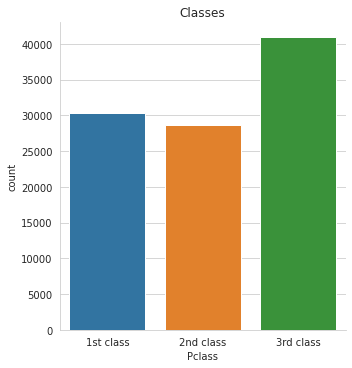

В первом классе находится 30.3%, во втором 28.7%, в третьем 41.0% от общего количества пассажиров


In [ ]:
g = sns.catplot(x="Pclass", kind='count', data=df).set(title='Classes').set_xticklabels(["1st class", "2nd class", "3rd class"])
plt.show()

classes = (df['Pclass'].value_counts().sort_index() / len(df)) * 100
print(f"В первом классе находится {round(classes.values[0], 1)}%, во втором {round(classes.values[1], 1)}%,\
 в третьем {round(classes.values[2], 1)}% от общего количества пассажиров")


**Категория Sex**

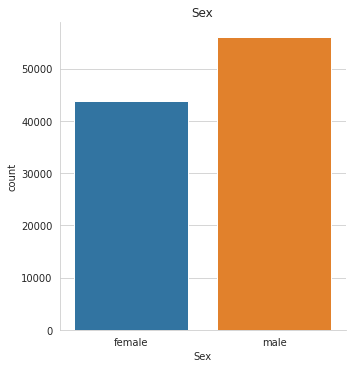

Количесво мужчин составляло 56.1%, а женщин 43.9%, от общего количества пассажиров


In [ ]:
g = sns.catplot(x="Sex", kind='count', data=df).set(title='Sex')
plt.show()

sex = (df['Sex'].value_counts() / len(df)) * 100
print(f"Количесво мужчин составляло {round(sex.values[0], 1)}%, а женщин {round(sex.values[1], 1)}%,\
 от общего количества пассажиров")

**Категория Sibsp**

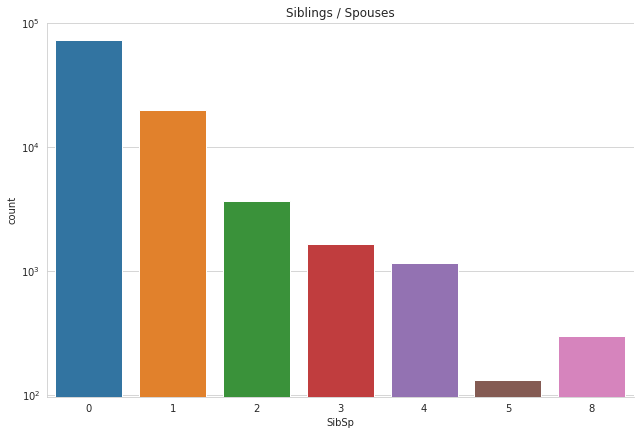

Количество братьев и сестер/супругов, в процентах от общего количества пассажиров:
0 : 73.293 %
1 : 19.768 %
2 : 3.705 %
3 : 1.636 %
4 : 1.169 %
5 : 0.132 %
6 : 0.296 %


In [ ]:
g = sns.catplot(x="SibSp", kind='count', data=df, log=True, height=6, aspect=1.5).set(title='Siblings / Spouses')
plt.show()

sibsp = (df['SibSp'].value_counts().sort_index() / len(df)) * 100
print("Количество братьев и сестер/супругов, в процентах от общего количества пассажиров:")
for i, v in enumerate(sibsp):
    print(f"{i } : {round(v, 3)} %")


**Категория Parch**

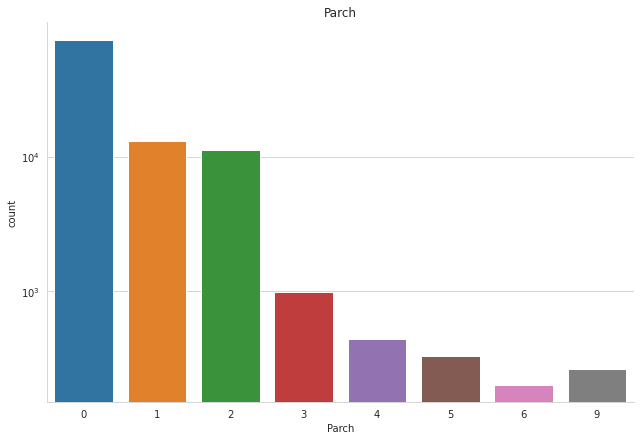

Количество родителей/детей, в процентах от общего количества пассажиров:
0 : 73.524%
1 : 13.004%
2 : 11.243%
3 : 0.984%
4 : 0.446%
5 : 0.331%
6 : 0.204%
7 : 0.264%


In [ ]:
g = sns.catplot(x="Parch", kind='count', data=df, log=True, height=6, aspect=1.5).set(title='Parch')
plt.show()

parch = (df['Parch'].value_counts().sort_index() / len(df)) * 100
print("Количество родителей/детей, в процентах от общего количества пассажиров:")
for i, v in enumerate(parch):
    print(f"{i } : {round(v, 3)}%")

**Категория Embarked**

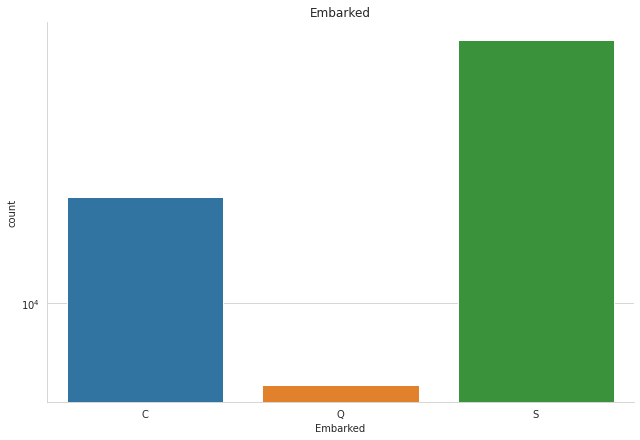

Количесво пассажиров которое погрузилось на корабль в порте C : 22.2%, в порте Q : 5.4%, а в порте S : 72.4% от общего количества пассажиров


In [ ]:
g = sns.catplot(x="Embarked", kind='count', data=df, log=True, height=6, aspect=1.5).set(title='Embarked')
plt.show()

embarked = (df['Embarked'].value_counts().sort_index() / len(df)) * 100
print(f"Количесво пассажиров которое погрузилось на корабль в порте {embarked.index[0]} : {round(embarked.values[0], 1)}%, в порте {embarked.index[1]} : {round(embarked.values[1], 1)}%,\
 а в порте {embarked.index[2]} : {round(embarked.values[2], 1)}% от общего количества пассажиров")


**Категория Age**

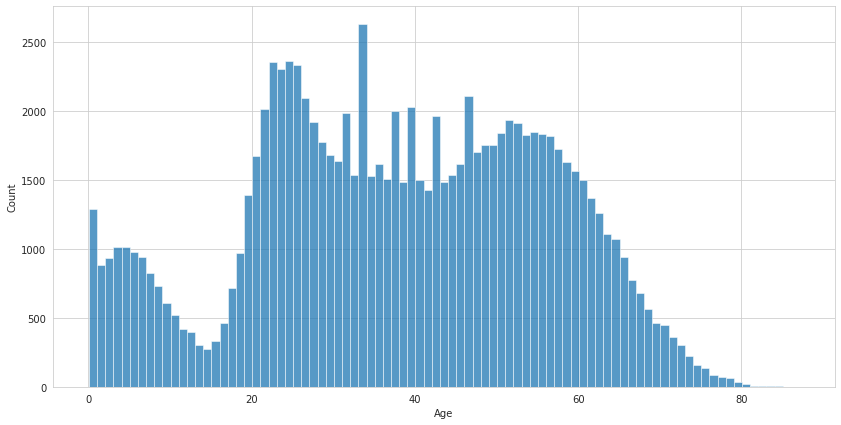

In [ ]:
# Гистограмма Ages

plt.figure(figsize=(14,7))
# sns.set_style("darkgrid")
sns.histplot(data=df, x='Age', edgecolor="white", linewidth=0.5, binwidth=1)
plt.show()


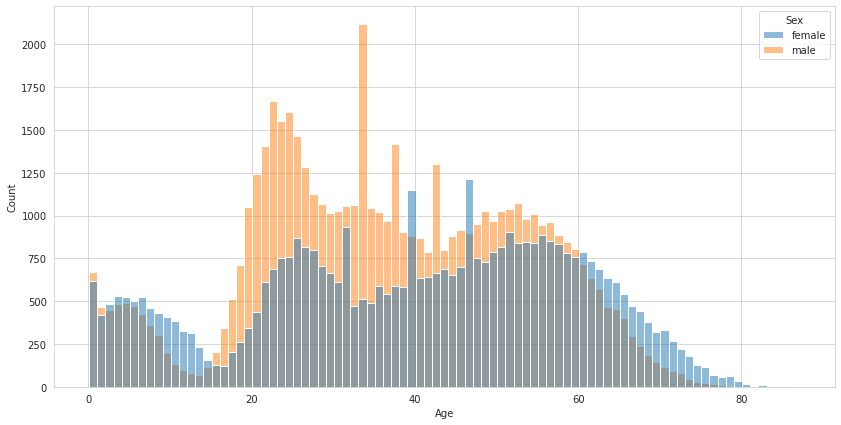

In [ ]:
# Гистограмма Age в зависимости от пола
# Распределения возраста мужчин и женщин

plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
sns.histplot(data=df, x='Age', hue="Sex", edgecolor="white", linewidth=1, binwidth=1)
plt.show()

Из графика видно, что в диапазоне возрастов примерно от 2 лет до 15, девочек больше, чем мальчиков. Также в возрасте примерно 38-40, 52-54 года и 60 лет и старше женщин больше, чем мужчин, на всех остальных промежутках мужчин больше, чем женщин.

**Категория Age в зависимости от Sex и Survived**

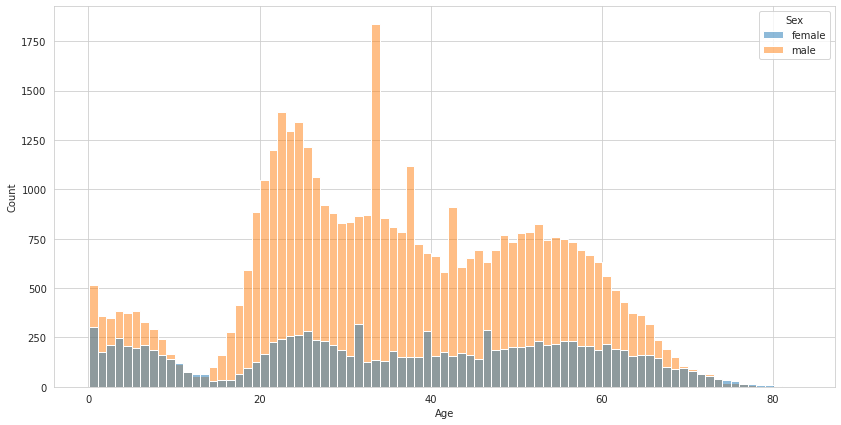

In [ ]:
# Погибшие
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
sns.histplot(data=df.loc[df['Survived'] == 0], x='Age', hue="Sex", edgecolor="white", linewidth=1, binwidth=1)
plt.show()


Почти во всех возрастах количество погибших мужчин больше чем женщин. 

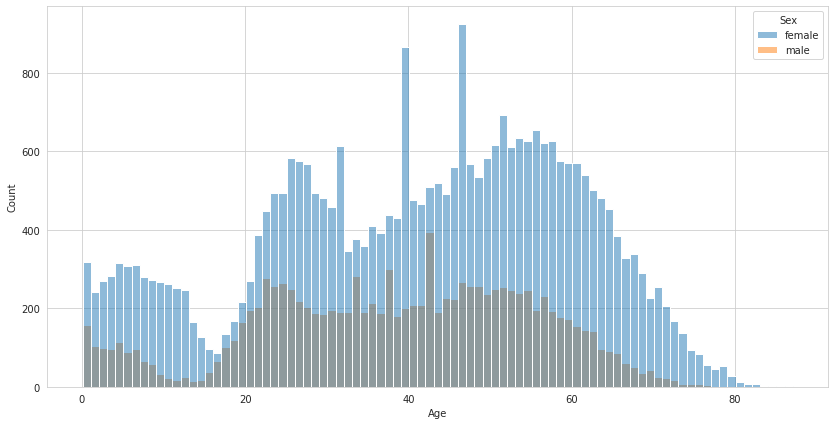

In [ ]:
# Выжившие
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
sns.histplot(data=df.loc[df['Survived'] == 1], x='Age', hue="Sex", edgecolor="white", linewidth=1, binwidth=1)
plt.show()

На всем диапазоне возрастов количество выживших женщин больше мужчин.

**Категория Fare**

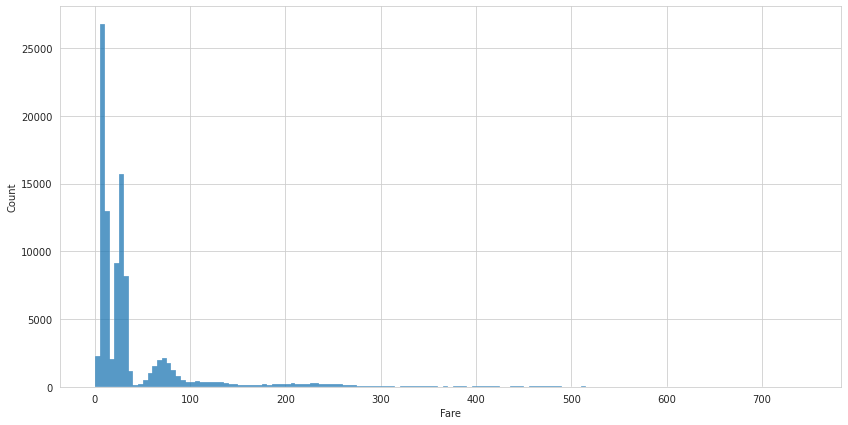

In [ ]:
# Стоимость билета (по Х логарифмический масштаб)
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
sns.histplot(data=df, x='Fare',edgecolor="white", linewidth=0.25, element="step", log_scale=(False, False), binwidth=5)
plt.show()


Видно, что основная масса билетов куплена за сумму меньше 100

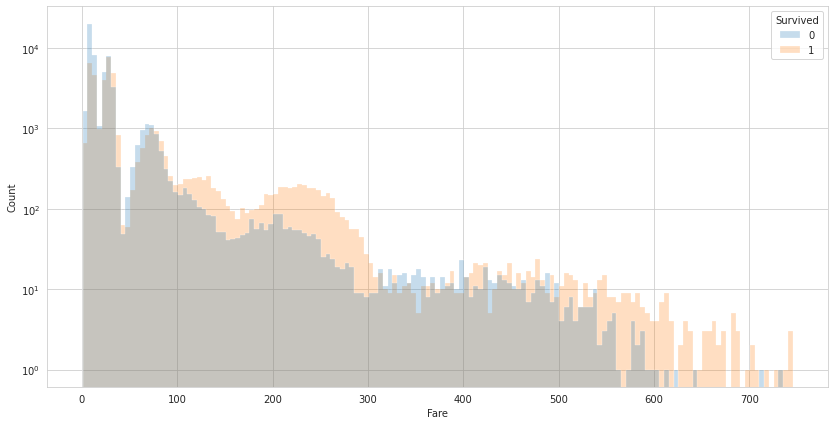

In [ ]:
plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
sns.histplot(data=df, x='Fare', hue='Survived', edgecolor="white", linewidth=0.25, element="step", log_scale=(False, True), binwidth=5)
plt.show()

Видно, что соотношение погибших к выжившим выше в начале диапазона и уменьшается к концу, за исключением отрезка от 310 до 500 долларов.

**Погибшие/выжившие в зависимости от пола**

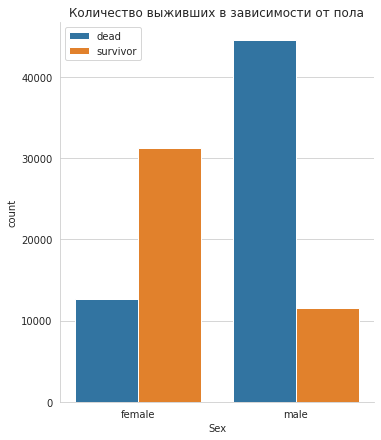

In [ ]:
g = sns.catplot(x="Sex", hue="Survived", 
                data=df, kind="count",
                height=6, aspect=.9, legend=False).set(title='Количество выживших в зависимости от пола')
plt.legend(labels=["dead","survivor"])
plt.show()

                

Как видно количество погибших мужчин почти в 4 раза превышает количество погибших женщин, а количество выживших мужчин приблизительно в 3 раза меньше количества выживших женщин.

In [ ]:
d = df.groupby(['Sex', 'Survived']).Sex.count()
female = d[0] + d[1]
male = d[2] + d[3]
print(f"Количество выживших жещин {round(d[1]/female * 100, 1)}% от всех женщин, мужчин {round(d[3]/male * 100, 1)}% от всех мужчин")
print(f"Количество выживших жещин {round(d[1]/(female+male)* 100, 1)}%, мужчин {round(d[3]/(female+male) * 100, 1)}% от всех людей")
print(f"Количество погибших жещин {round(d[0]/female * 100, 1)}% от всех женщин, мужчин {round(d[2]/male * 100, 1)}% от всех мужчин")
print(f"Количество погибших жещин {round(d[0]/(female+male) * 100, 1)}%, мужчин {round(d[2]/(female+male) * 100, 1)}% от всех людей")


Количество выживших жещин 71.2% от всех женщин, мужчин 20.6% от всех мужчин
Количество выживших жещин 31.2%, мужчин 11.6% от всех людей
Количество погибших жещин 28.8% от всех женщин, мужчин 79.4% от всех мужчин
Количество погибших жещин 12.7%, мужчин 44.5% от всех людей


**Погибшие/выжившие в зависимости от пола и класса каюты**

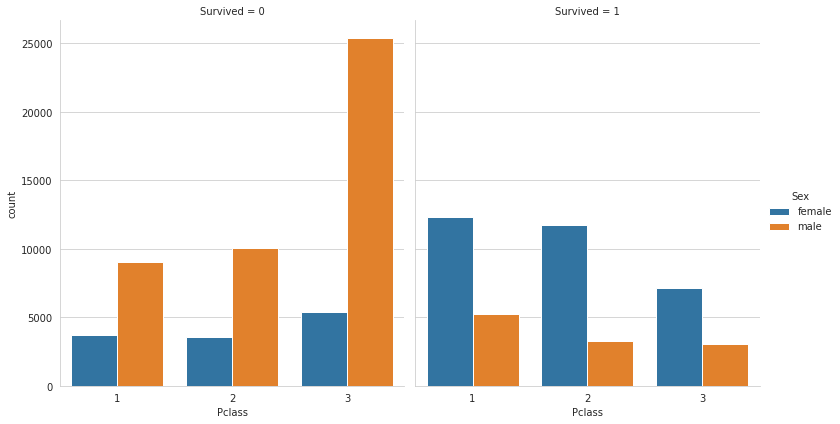

In [ ]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df, kind="count", height=6, aspect=.9)


Видно, что самая большая часть погибших это мужчины третьего класса, доля погибших мужчин первого и второго класса меньше примерно в 2,5 раза и  примерно одинакова. Доля погибших женщин первого и второго класса примерно одинаковы, а третьего класса преобладает на первыми двумя классами. В категории выжившие самые большие значения у женщин первого и второго класса, количество выживших женщин третьего класса меньше примерно в 1,5 раза. Самой большое количество выживших мужчин у первого класса, доля второго и третьего класса примерно равна и меньше первого приблизительно в 1,5 раза.

**Погибшие/выжившие в зависимости от количество братьев и сестер/супругов на борту и пола**

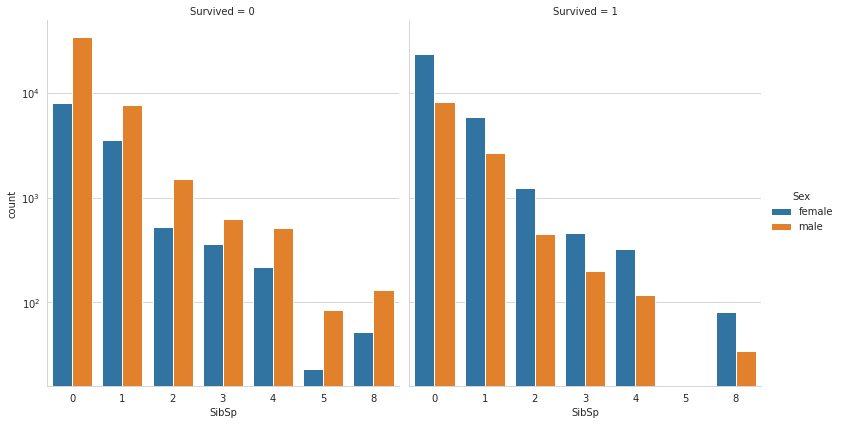

In [ ]:
g = sns.catplot(x="SibSp", hue="Sex", col="Survived", log=True,
                data=df, kind="count", height=6, aspect=.9)

Количество погибших мужчин и женщин уменьшается с увеличением количества братьев/сестер/супругов. Погибших женщин в каждой категории меньше, чем мужчин. Количество выживыших тоже уменьшается с увеличением количества братьев/сестер/супругов, выживших женщин больше, чем мужчин в каждой категории. Самое большое количество мужчин и женщин погибших и выживших с количеством братьев/сестер/супругов = 0, потому как эти пассажиры составляют 73.293 % от общего количества. 

**Погибшие/выжившие в зависимости от количества родителей/детей на борту и пола**

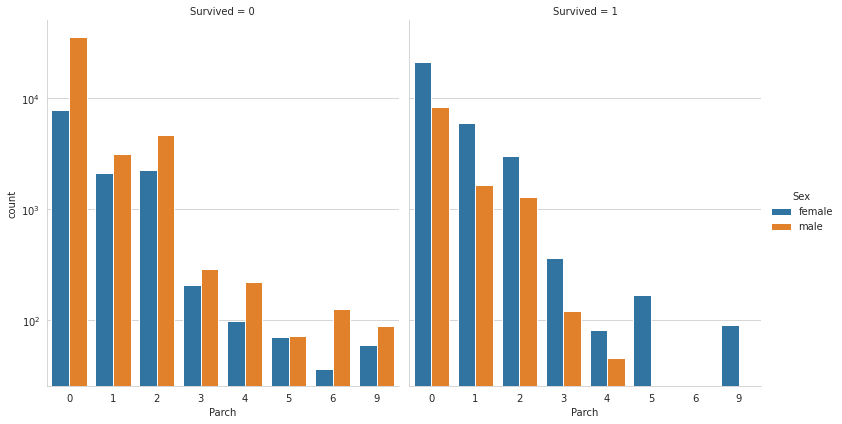

In [ ]:
g = sns.catplot(x="Parch", hue="Sex", col="Survived", log=True,
                data=df, kind="count", height=6, aspect=.9)

Количество погибших мужчин и женщин уменьшается с увеличением количества  родителей/детей. Погибших женщин в каждой категории меньше, чем мужчин. Количество выживыших тоже уменьшается с увеличением количества братьев/сестер/супругов, выживших женщин больше, чем мужчин в каждой категории. Самое большое количество мужчин и женщин погибших и выживших с количеством родителей/детей = 0, потому как эти пассажиры составляют 73.524% % от общего количества. 

**Погибшие/выжившие в зависимости от места посадки на борт и пола**

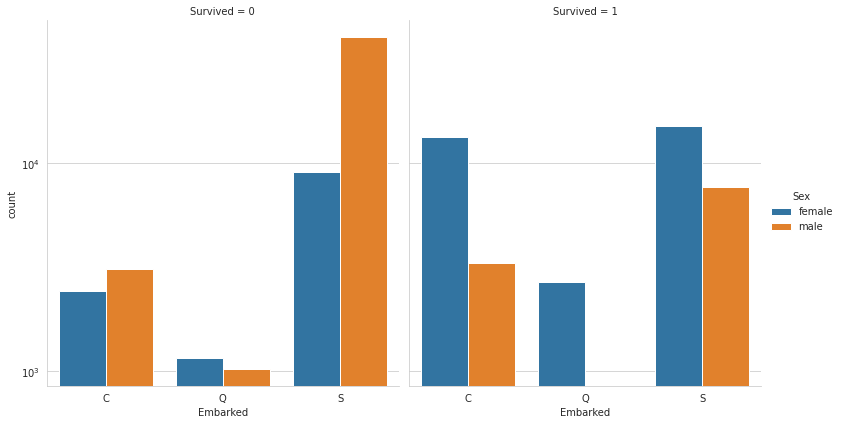

In [ ]:
g = sns.catplot(x="Embarked", hue="Sex", col="Survived", log=True,
                data=df, kind="count", height=6, aspect=.9)


Количество погибших мужчин и женщин самое высокое в месте посадки Southampton, следующее по количеству погибших идет Cherbourg, Queenstown самое маленькое количество погибших. Кроме Queenstown, количество погибших женщин меньше, чем мужчин. Количесво выживших женщин примерно одинаково в  Cherbourg и Southampton, мужчин в каждой категории меньше женщин, в категории Queenstown выживших мужчин вообще не показано на графике. Большое количесвто погиших/ выживших в Southampton обусловлено тем, что 72.4% пассажиров погрузились на борт именно там.

In [ ]:
gender = {"male": 1, "female": 0}
df['Sex'] = df['Sex'].map(gender)
port = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(port)
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",1,42.253032,2,0,209245,27.14,C12239,0
1,1,0,3,"Bryan, Drew",1,34.043334,0,0,27323,13.35,NaN,0
2,2,0,3,"Owens, Kenneth",1,0.330000,1,2,CA 457703,71.29,NaN,0
3,3,0,3,"Kramer, James",1,19.000000,0,0,A. 10866,13.04,NaN,0
4,4,1,3,"Bond, Michael",1,25.000000,0,0,427635,7.76,NaN,0


In [ ]:
df['Survived'] = df['Survived'].astype('int64')
df['Pclass'] = df['Pclass'].astype('int64')
df['Sex'] = df['Sex'].astype('int64')
df['SibSp'] = df['SibSp'].astype('int64')
df['Parch'] = df['Parch'].astype('int64')
df['Embarked'] = df['Embarked'].astype('int64')

**Матрица корреляции между признаками**

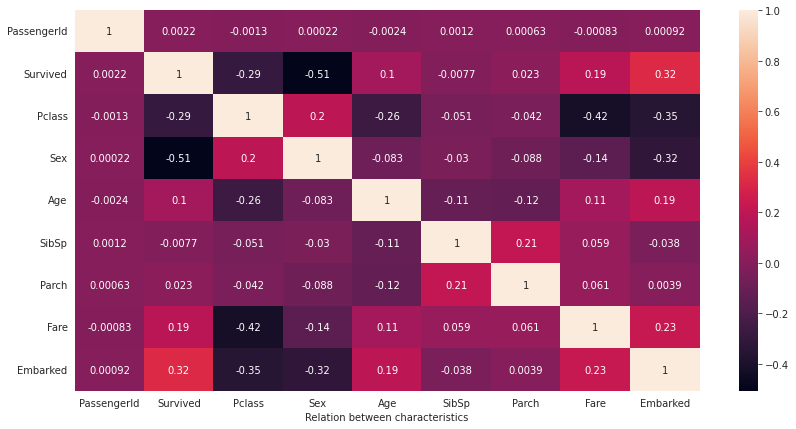

In [ ]:
corrMatrix = df.corr(method='pearson')

plt.figure(figsize=(14,7))
sns.heatmap(data=corrMatrix, annot=True)
plt.xlabel("Relation between characteristics")
plt.show()

Если смотреть только на категорию Survived видно, что есть некая связь с категориями Sex, Pclass, Fare, Embarked.

# Summary

**В результате анализа датасета были сделаны следующие пункты:**

*Данные проверены на наличие пропуском, выбросов и дубликатов:*

1.   Найдены пропущенные значения: в Age - 3292, Ticket - 4623, Fare - 134, Cabin - 67866, Embarked - 250.
2.   Проведена проверка на дубликаты. Найдено 62 значения совпадающие по категориям Name, Age, SibSp, Parch, Pclass, Embarked. Решено удалить эти значения из датасета.
3.   Найдены выбросы в категории Fare, в других не нашел. Получено выбросов для 1-го класса: 2069, 2-го: 1808, 3-го: 2761. Эти значения были исключены при получении среднего по каждому классу для заполнения пропущенных значений в категории Fare. Выбросы не удалялись и не изменялись в датасете.
4.   Заменены пропущеные значения в категории Age средним по классу и полу, в категории Embarked самым частым значением, а в категории Fare средним по классу без учета выбросов.

*В результате исследований данных было получено:*

1.   Общее число погиших составило примерно 57,2% от общего кол-ва пассажиров.
2.   Самое большое количество пассажиров ехало 3-м классом.
3.   Количество женщин 43,9%, а мужчин 56,1% от общего кол-ва пассажиров.
4.   Количество пассажиров не имеющих братьев и сестер/супругов составило 73,3% от общего кол-ва пассажиров.
5.   Количество пассажиров не имеющих родителей/детей составило 73,5% от общего кол-ва пассажиров.
6.   Наибольшее количесво пассажиров зашло на борт в Southampton : 72.4% от общего кол-ва пассажиров.
7.   *Погибшие/выжившие в зависимости от пола и класса каюты.*  Количество погибших мужчин почти в 4 раза превышает количество погибших женщин, а количество выживших мужчин приблизительно в 3 раза меньше количества выживших женщин.
8.   *Погибшие/выжившие в зависимости от пола и стоимости билета.*   
В диапазоне возрастов примерно от 2 лет до 15, девочек больше, чем мальчиков. Также в возрасте примерно 38-40, 52-54 года и 60 лет и старше женщин больше, чем мужчин, на всех остальных промежутках мужчин больше, чем женщин. Почти во всем диапазоне возрастов погибших мужчин больше, чем погибших женщин, также количество выживших женщин больше мужчин.
9.   *Погибшие/выжившие в зависимости от пола и класса каюты.*  
Видно, что самая большая часть погибших это мужчины третьего класса, доля погибших мужчин первого и второго класса меньше примерно в 2,5 раза и примерно одинакова. Доля погибших женщин первого и второго класса примерно одинаковы, а третьего класса преобладает на первыми двумя классами. В категории выжившие самые большие значения у женщин первого и второго класса, количество выживших женщин третьего класса меньше примерно в 1,5 раза. Самой большое количество выживших мужчин у первого класса, доля второго и третьего класса примерно равна и меньше первого приблизительно в 1,5 раза
10.   *Погибшие/выжившие в зависимости от количество братьев и сестер/супругов на борту и пола.*   Количество погибших мужчин и женщин уменьшается с увеличением количества братьев/сестер/супругов. Погибших женщин в каждой категории меньше, чем мужчин. Количество выживыших тоже уменьшается с увеличением количества братьев/сестер/супругов, выживших женщин больше, чем мужчин в каждой категории. Самое большое количество мужчин и женщин погибших и выживших с количеством братьев/сестер/супругов = 0, потому как эти пассажиры составляют 73.293 % от общего количества.
11.   *Погибшие/выжившие в зависимости от количества родителей/детей на борту и пола.*   Количество погибших мужчин и женщин уменьшается с увеличением количества  родителей/детей. Погибших женщин в каждой категории меньше, чем мужчин. Количество выживыших тоже уменьшается с увеличением количества братьев/сестер/супругов, выживших женщин больше, чем мужчин в каждой категории. Самое большое количество мужчин и женщин погибших и выживших с количеством родителей/детей = 0, потому как эти пассажиры составляют 73.524% % от общего количества. 
12.   *Погибшие/выжившие в зависимости от места посадки на борт и пола.*   Количество погибших мужчин и женщин самое высокое в месте посадки Southampton, следующее по количеству погибших идет Cherbourg, Queenstown самое маленькое количество погибших. Кроме Queenstown, количество погибших женщин меньше, чем мужчин. Количесво выживших женщин примерно одинаково в Cherbourg и Southampton, мужчин в каждой категории меньше женщин, в категории Queenstown выживших мужчин вообще не показано на графике. Большое количесвто погиших/ выживших в Southampton обусловлено тем, что 72.4% пассажиров погрузились на борт именно там.
13.    *Матрица корреляции между признаками.*   Если смотреть только на категорию Survived видно, что есть некая связь с категориями Sex, Pclass, Fare, Embarked.

*   Наибольший шанс выжить был у девочек до 16 лет и  женщин старше 20 лет 
ехавших в первом и втором классе, без супруга/братьев/сестер и без родителей/детей севших в Southampton или Cherbourg.
*   Наименьший шанс выжить был у мальчиков до 8 лет и мужчин в возрасте от  15 до примерно 70 лет ехавшим в третьем классе без братьев/сестер или с одним, без родителей/детей или с двумя, севшим в Southampton.